In this notebook, I will go through the most significant sites found in the pilot study of chrX on baboons with the Relate selective scan.

In [1]:
%run ../scripts/notebook_settings_lean.py
#from horizonplot import horizonplot

/faststorage/project/baboondiversity/people/eriks/second_analysis_baboons/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


In [2]:
relate_sele = pd.read_csv("../results/all_individuals_relate/chromX_selection.sele", sep=" ")
relate_sele["-log10 P-value"] = -relate_sele["when_mutation_has_freq2"]

[(0.0, 12.0)]

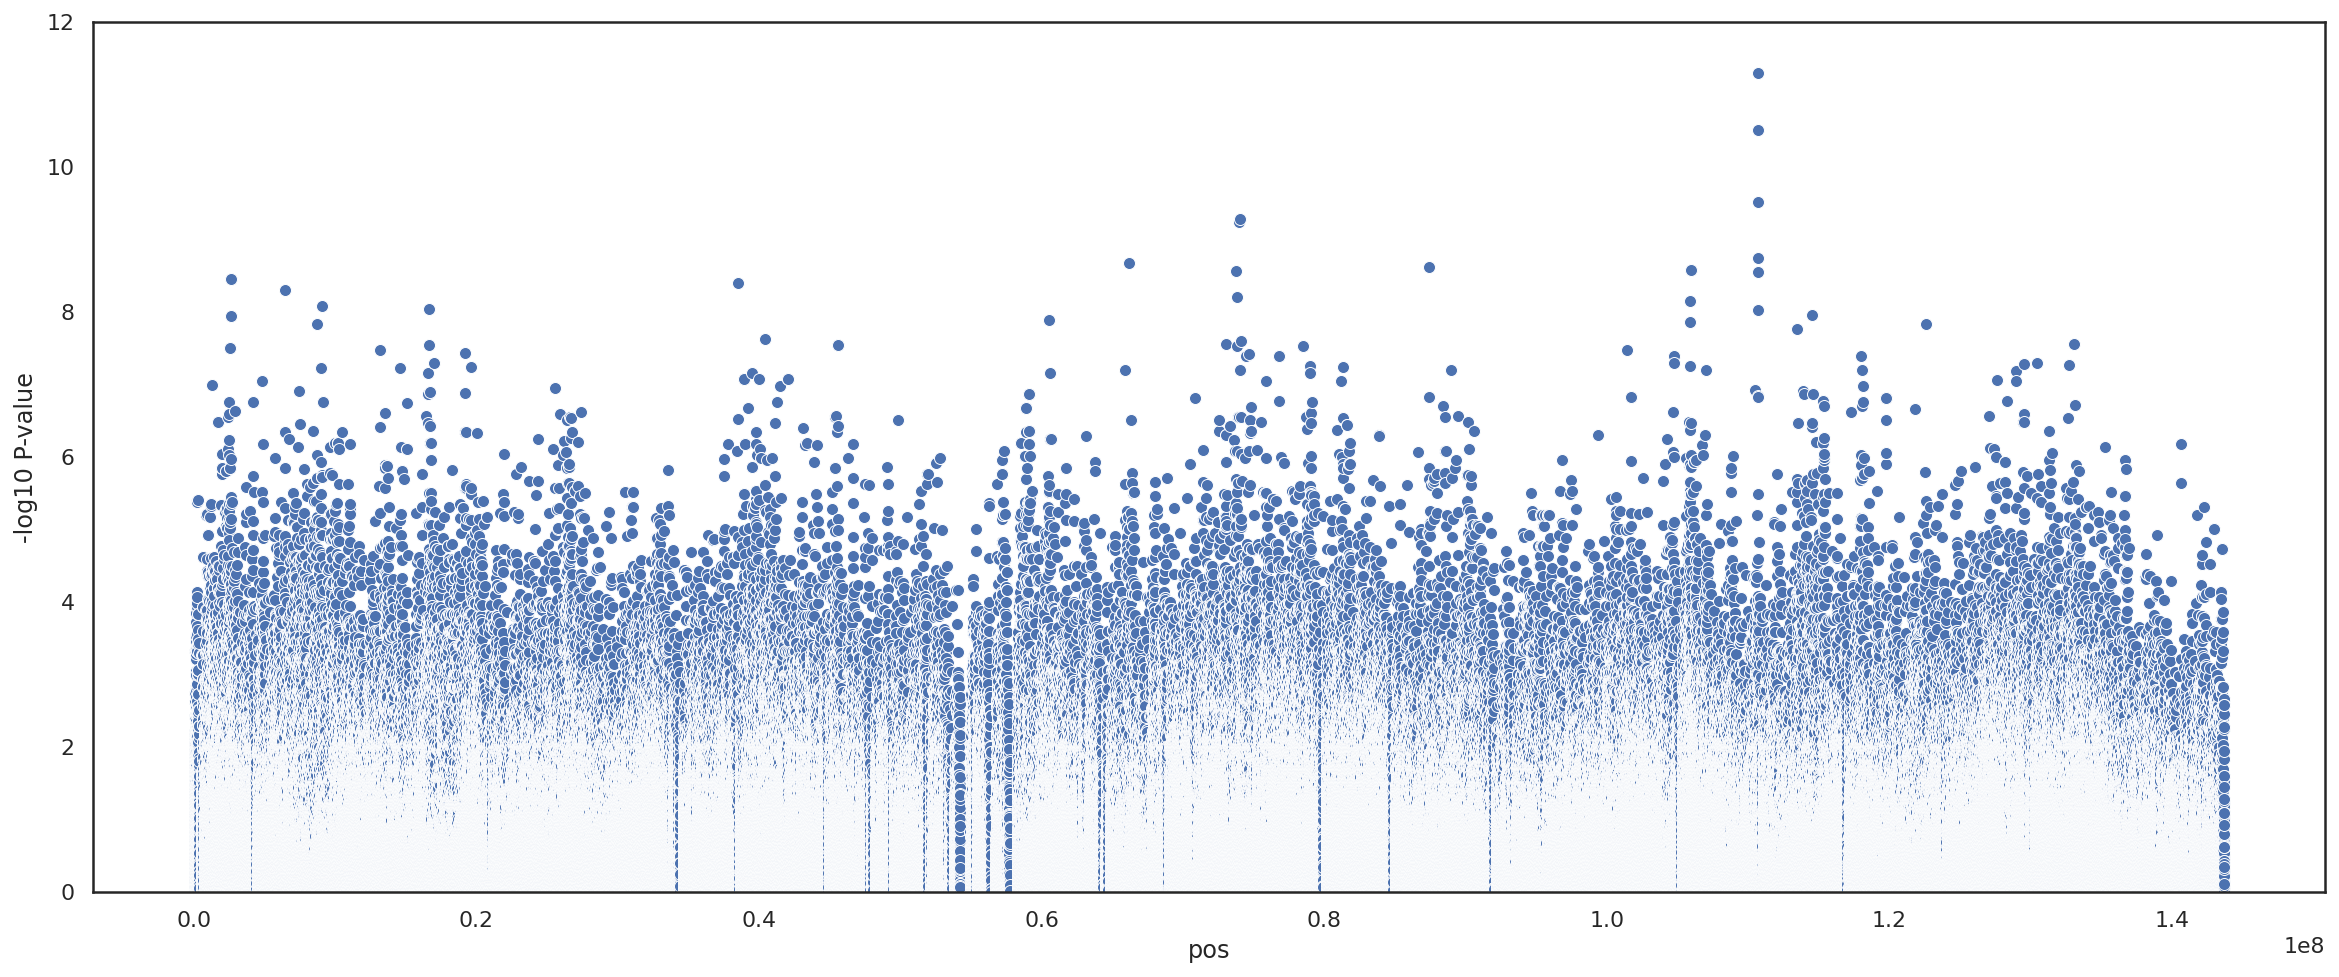

In [3]:
plt.figure(figsize=(20,8))
g = sns.scatterplot(data=relate_sele, x="pos", y="-log10 P-value")
g.set(ylim=(0, 12))

In [4]:
relate_sele.sort_values(["-log10 P-value"], ascending = False)

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
859706,110716419,X:110716419:C:T,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.641170,-0.944895,-7.028030e-01,-0.674088,-0.512751,-0.320410,0,-3.092860,-11.295400,11.295400
859707,110716425,X:110716425:G:A,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.378670,-0.672999,-5.028700e-01,-0.513279,-0.431025,-0.276662,0,-2.816590,-10.506600,10.506600
859708,110716428,X:110716428:G:C,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.299130,-0.639838,-4.784980e-01,-0.493168,-0.420408,-0.270907,0,-2.646550,-9.521020,9.521020
551523,74015344,X:74015344:C:A,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.683320,-1.224070,-1.020590e+00,-0.808173,-1.179130,-1.134210,0,-3.403380,-9.285740,9.285740
551220,73975603,X:73975603:C:T,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,-3.689060,-3.097230,-2.164230e+00,-1.948130,-1.422330,-1.092730,0,-4.349250,-9.244420,9.244420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817672,105898098,X:105898098:C:T,1,1.0,1.0,-0.000026,-0.000024,-0.000038,-0.000025,-0.000006,...,-0.000034,0.000000,0.000000e+00,-0.000033,-0.000040,-0.000015,0,-0.000086,-0.000026,0.000026
818139,105936227,X:105936227:T:C,1,1.0,1.0,1.000000,1.000000,-0.000026,-0.000024,-0.000018,...,-0.000034,-0.000006,-1.325090e-05,0.000000,-0.000045,-0.000015,0,-0.000086,-0.000026,0.000026
818405,105957727,X:105957727:T:C,1,1.0,1.0,1.000000,1.000000,-0.000026,-0.000024,-0.000025,...,-0.000038,-0.000006,-1.895070e-05,-0.000018,-0.000003,-0.000015,0,-0.000180,-0.000026,0.000026
817696,105899225,X:105899225:T:C,1,1.0,1.0,-0.000026,-0.000022,-0.000022,-0.000024,-0.000009,...,-0.000038,-0.000018,-4.247470e-07,-0.000033,-0.000022,-0.000021,0,-0.000086,-0.000026,0.000026


In [5]:
window_size = 100000
pos_list, pval_list = [], []

for i in range(0, relate_sele.pos.iloc[-1], window_size):
    sub_df = relate_sele.loc[(relate_sele.pos >= i) & (relate_sele.pos < i+window_size)]
    if len(sub_df) > 0:
        sorted_df = sub_df.sort_values(["-log10 P-value"], ascending = False)
        pos_list.append(sorted_df.pos.iloc[0]), pval_list.append(sorted_df["-log10 P-value"].iloc[0])

In [6]:
selection_window_df = pd.DataFrame({"pos": pos_list, "-log10 P-value": pval_list})

In [7]:
sorted_sele = selection_window_df.sort_values(["-log10 P-value"], ascending = False)

In [8]:
sorted_sele.to_csv("sorted_selection_logp.txt", sep="\t", index=False)